# Lung cancer prediction using decision tree
<br> 1. Data Exploration
<br> 2. Using DecisionTreeClassifier for prediction of lung cancer
<br> 3. Model evaluation

### Dataset: lung_cancer.csv

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Read the data
df = pd.read_csv("lung_cancer.csv")

In [41]:
#A brief look at dataframe
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,Medium
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,Medium
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [42]:
df.shape

(1000, 26)

### Dataset information => new feature name (if any)
<br> For easy data processing
<br> Age	The age of the patient. (Numeric)
<br>Gender	The gender of the patient. (Categorical)
<br>Air Pollution	The level of air pollution exposure of the patient. (Categorical)
<br>Alcohol use	The level of alcohol use of the patient. (Categorical)
<br>Dust Allergy	The level of dust allergy of the patient. (Categorical)
<br>OccuPational Hazards	The level of occupational hazards of the patient. (Categorical)
<br>Genetic Risk	The level of genetic risk of the patient. (Categorical)
<br>chronic Lung Disease	The level of chronic lung disease of the patient. (Categorical)
<br>Balanced Diet	The level of balanced diet of the patient. (Categorical) => Diet
<br>Obesity	The level of obesity of the patient. (Categorical)
<br>Smoking	The level of smoking of the patient. (Categorical)
<br>Passive Smoker	The level of passive smoker of the patient. (Categorical)
<br>Chest Pain	The level of chest pain of the patient. (Categorical)
<br>Coughing of Blood	The level of coughing of blood of the patient. (Categorical) => BLood cough
<br>Fatigue	The level of fatigue of the patient. (Categorical)
<br>Weight Loss	The level of weight loss of the patient. (Categorical)
<br>Shortness of Breath	The level of shortness of breath of the patient. (Categorical)
<br>Wheezing	The level of wheezing of the patient. (Categorical)
<br>Swallowing Difficulty	The level of swallowing difficulty of the patient. (Categorical) => Swallowing
<br>Clubbing of Finger Nails	The level of clubbing of finger nails of the patient. (Categorical) => Finger nail

In [43]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [44]:
df.rename(columns = {'Balanced Diet':'Balanced Diet', 'Coughing of Blood': 'BLood cough',
                            'Swallowing Difficulty':'Swallowing',
                    'Clubbing of Finger Nails':'Finger nail'}, inplace = True)

In [45]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing,Finger nail,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,Medium
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,Medium
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [46]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'BLood cough', 'Fatigue', 'Weight Loss',
       'Shortness of Breath', 'Wheezing', 'Swallowing', 'Finger nail',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [47]:
#To check any NA values in the dataframe
#The result is 0 which means there is no NA
df.isna().sum().sum()

0

## Modelling

In [48]:
X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'BLood cough', 'Fatigue', 'Weight Loss',
       'Shortness of Breath', 'Wheezing', 'Swallowing', 'Finger nail',
       'Frequent Cold', 'Dry Cough', 'Snoring']]
y = df[['Level']]

## Splitting training and testing dataset

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Use DecisionTreeClassifier because the response value is discrete

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)#default is used for max_depth
model = model.fit(X_train,y_train)

In [58]:
predictions = model.predict(X_test)
predictions

array(['High', 'Low', 'Medium', 'Low', 'Medium', 'High', 'High', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Medium', 'Low', 'High', 'Medium', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'High', 'Medium', 'High',
       'Low', 'Medium', 'High', 'High', 'Medium', 'Low', 'Low', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'High', 'Medium',
       'High', 'Medium', 'Low', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Medium', 'Medium', 'Low', 'High', 'High', 'Low',
       'High', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low',
   

## Model evaluation

In [62]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       1.00      0.97      0.99       104
         Low       1.00      1.00      1.00        86
      Medium       0.97      1.00      0.99       110

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## Comment
The accuray of the model is very high, mostly because of the data.
<br> There is no need to do feature selection because the featureas are selected based on the default criterion which is the Gini index. And there is no need to perform standardization or Normalization for the Decision tree.
<br> This is a Multiclass classification because there are 3 categories in the response variable which are: High, Low, Medium.

## Plot the decistion tree

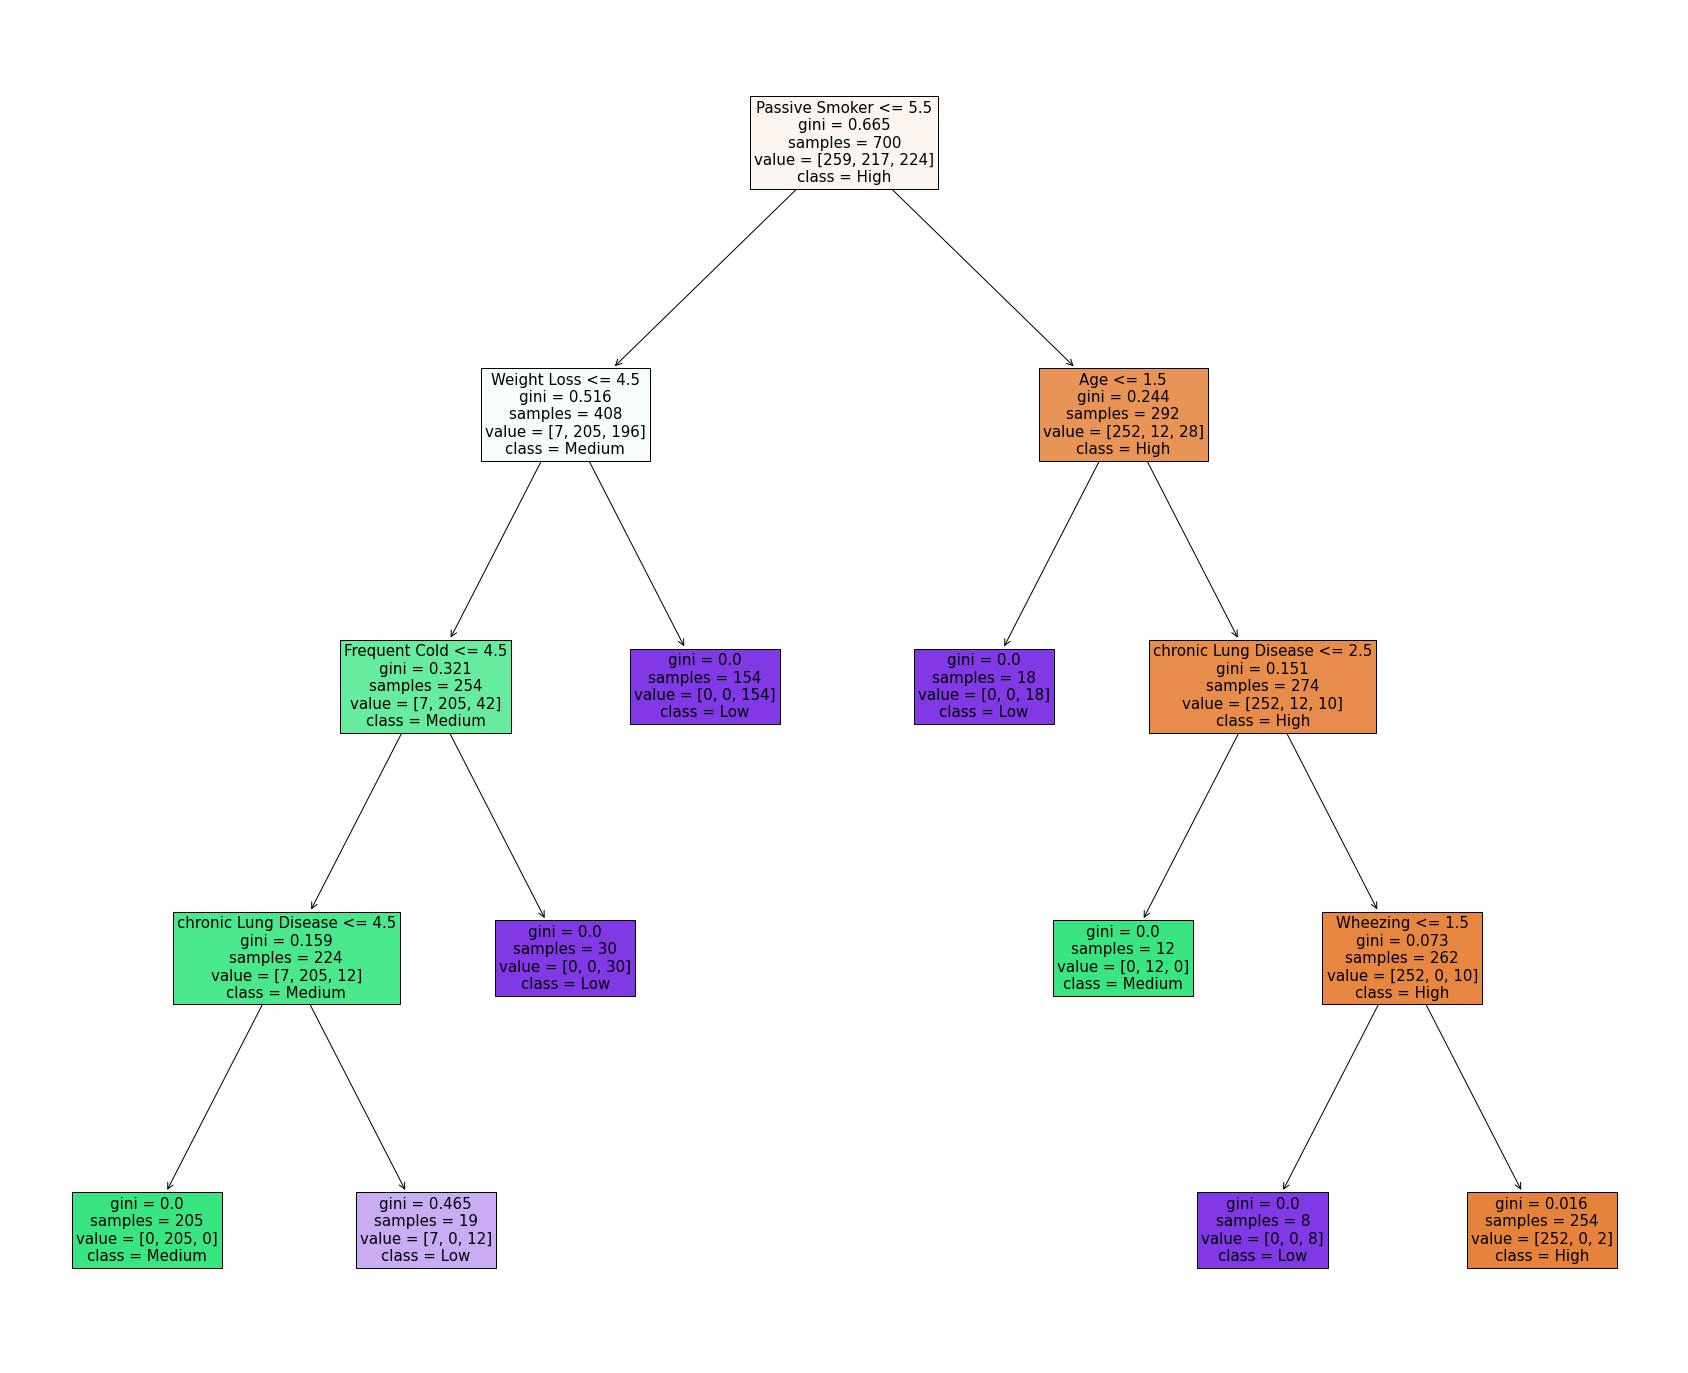

In [66]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
tree_plot = tree.plot_tree(model,
                     feature_names = df.columns,
                     class_names = ['High','Medium','Low'],
                     filled=True,
                     fontsize=15)